# Encodage MP3
## Le projet:
Nous devons partir d'un fichier audio .wav, donc un fichier audio non compressé, et le traiter pour en sortir un fichier audio en format .mp3
## Le format WAV
Le format .wav est un format audio non compressé comme dit précedemment. L'échantillon sur lequel nous avons travaillé est un échantillon avec une fréquence d'échantillonnage de 44 100 Hz, c'est-à-dire qu'il y a 44 100 "points" pris par seconde sur le signal analogique de départ pour en faire un signal numérique.
Les données de notre signal sont codées sur 16 bits (nous avons ainsi $2^{16}$ valeurs différentes possibles) et nous avons un son stéréo (un son mono gauche, un son mono droit).
Voici comment nous récupérons ces données :

In [1]:
%pylab inline
import scipy
import scipy.io.wavfile
scipy.io.wavfile.read('test.wav')

Populating the interactive namespace from numpy and matplotlib


(44100, array([[  0,   0],
        [ -1,   0],
        [  0,   0],
        ...,
        [144, 163],
        [113, 147],
        [ 73,  88]], dtype=int16))

Le problème ici étant la taille des données à traiter nous allons effectuer les traitements d'encodage MP3 sur une plus petite portion.

In [2]:
freq, data = scipy.io.wavfile.read('test.wav')
print(len(data))
# Nous avons choisi de prendre 2^20 echantillons
portionData = data[:2**20]
print(len(portionData))

8833224
1048576


Voici le signal récupéré:

In [3]:
def afficheSignalTemps(donneeTemps, freq):
    n = len(donneeTemps) #Taille du signal
    te = 1.0 / freq #Periode d'échantillonnage
    duree = ((1.0 * (n)) / (freq)) #Duree du signal
    t = zeros(n) #Construction 
    for k in range(n):
        t[k] = te*k
    figure(figsize=(12,4))
    plot(t, donneeTemps)
    xlabel("t (s)")
    ylabel("amplitude") 
    axis([0, duree, donneeTemps.min(), donneeTemps.max()])
    grid()

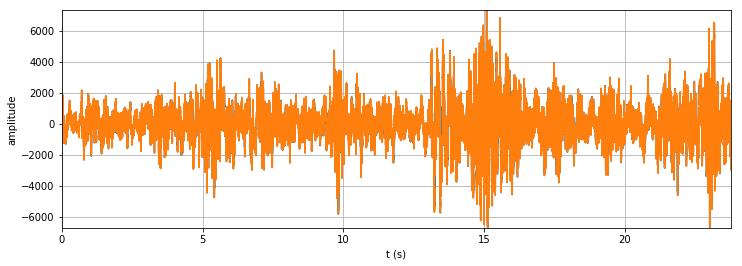

In [4]:
afficheSignalTemps(portionData, freq)

Nous allons effectuer une fft (par partie de 10 échantillons pour améliorer la précision) pour avoir un aperçu du signal en fréquences:

In [5]:
def fourierparpartie(data, debut, fin, taillefenetre):
    res = []
    taille = fin - debut
    reste = taille % taillefenetre
    newtaille = int((taille - reste) / taillefenetre)
    for k in range(0, newtaille):
        liste = data[(taillefenetre * k):(taillefenetre * (k+1))]
        tmp = numpy.fft.fft2(liste)
        res = res + [tmp]
    if reste > 0:
        liste = data[(fin - reste): fin]
        res = res + [numpy.fft.fft2(liste)]
    return res

In [6]:
#donneeFreq = fourierparpartie(portionData, 0, len(portionData), 10)

In [7]:
def plotMono(snd, sampFreq):

    #sampFreq, snd = scipy.io.wavfile.read(file_name)

    snd = snd / (2.**15) #convert sound array to float pt. values

    s1 = snd[:,0] #left channel
    soundLeft = s1

    s2 = snd[:,1] #right channel
    soundRight = s2

    n = len(s1)
    p = fft.fft(s1) # take the fourier transform of left channel
    ma_var = p

    m = len(s2) 
    p2 = fft.fft(s2) # take the fourier transform of right channel
    ma_var2 = p2

    nUniquePts = int(ceil((n+1)/2.0))
    print(nUniquePts)
    p = p[0:nUniquePts]
    p = abs(p)

    mUniquePts = int(ceil((m+1)/2.0))
    p2 = p2[0:mUniquePts]
    p2 = abs(p2)

    #'''
    #Left Channel
    #'''
    p = p / float(n) # scale by the number of points so that
                     # the magnitude does not depend on the length 
                     # of the signal or on its sampling frequency  
    p = p**2  # square it to get the power 




# multiply by two (see technical document for details)
# odd nfft excludes Nyquist point
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n);
    plt.plot(freqArray/1000, 10*log10(p), color='k')
    plt.xlabel('LeftChannel_Frequency (kHz)')
    plt.ylabel('LeftChannel_Power (dB)')
    plt.show()

    #'''
    #Right Channel
    #'''
    p2 = p2 / float(m) # scale by the number of points so that
             # the magnitude does not depend on the length 
             # of the signal or on its sampling frequency  
    p2 = p2**2  # square it to get the power 




    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    if m % 2 > 0: # we've got odd number of points fft
         p2[1:len(p2)] = p2[1:len(p2)] * 2
    else:
         p2[1:len(p2) -1] = p2[1:len(p2) - 1] * 2 # we've got even number of points fft

    freqArray2 = arange(0, mUniquePts, 1.0) * (sampFreq / m);
    plt.plot(freqArray2/1000, 10*log10(p2), color='k')
    plt.xlabel('RightChannel_Frequency (kHz)')
    plt.ylabel('RightChannel_Power (dB)')
    plt.show()
    #return freqArray, freqArray2
    return ma_var, ma_var2, soundLeft, soundRight

524289


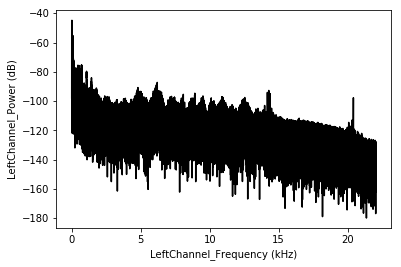

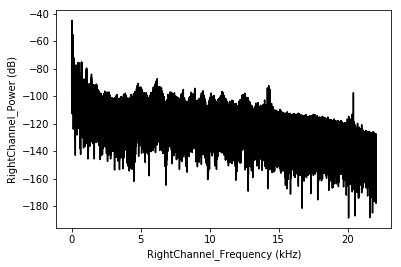

In [8]:
freqGauche, freqDroite, monoGauche, monoDroit = plotMono(portionData, freq)

23.777233560090703


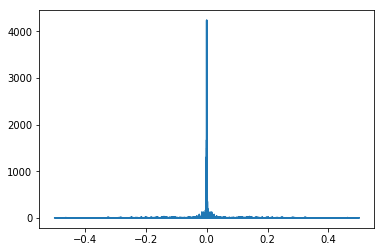

In [9]:
X = freqGauche
duree = ((1.0 * (len(monoGauche))) / (freq)) #Duree du signal
test = scipy.linspace(0, len(X), 30)
print(duree)
#N = 2**20
#Xdb = 20*scipy.log10(scipy.absolute(X))
#f = scipy.linspace(0, freq, N, endpoint=False)
#pylab.plot(f, Xdb)
#pylab.xlim(0, 50000)
frequency = fft.fftfreq(monoGauche.size)
plot(frequency, abs(X))

(0, 25000)

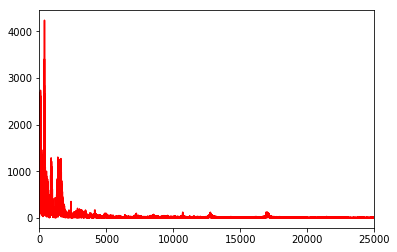

In [10]:
b = len(freqGauche) / 2 #pour la symétrie
plt.plot(abs(freqGauche[:(int(b)-1)]), 'r')
xlim(0, 25000)

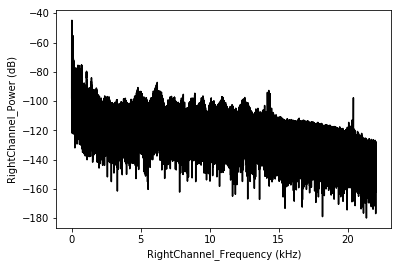

In [11]:
m = len(X)
p2 = freqGauche / float(m) # scale by the number of points so that
             # the magnitude does not depend on the length 
             # of the signal or on its sampling frequency  
p2 = p2**2  # square it to get the power
mUniquePts = int(ceil((m+1)/2.0))
p2 = p2[0:mUniquePts]
p2 = abs(p2)
if m % 2 > 0: # we've got odd number of points fft
    p2[1:len(p2)] = p2[1:len(p2)] * 2
else:
    p2[1:len(p2) -1] = p2[1:len(p2) - 1] * 2 # we've got even number of points fft
freqArray2 = arange(0, mUniquePts, 1.0) * (freq / m);
plt.plot(freqArray2/1000, 10*log10(p2), color='k')
plt.xlabel('RightChannel_Frequency (kHz)')
plt.ylabel('RightChannel_Power (dB)')
plt.show()

Nous allons commencer à traiter la partie encodage .mp3 et pour cela nous allons vous expliquer tout d'abord le principe.
## Le format MP3
Le format .mp3 est un format audio compressé avec perte d'information. Cependant, son principal avantage est qu'il permet de gagner un facteur 10 sur le poids final par rapport à un format non compressé comme le .wav (le facteur est plus ou moins important selon si l'on échantillonne plus ou moins finement).
Pour cela, il faut effectuer divers traitements certains induisant une perte d'informations d'autres non.
### I.Les traitements induisant une perte d'informations:
#### I.1.Suppression des fréquences non "importantes":
Ici, pour réduire la taille du fichier audio, les propriétés de l'oreille humaine sont utilisées.
L'oreille humaine ne perçoit les sons que dans un intervalle de fréquences bien précis: de 20Hz à 20kHz.
Toutes les fréquences au-dessus ou en-dessous de cet intervalle seront supprimées.
Nous avons cependant fait le choix de ne pas les supprimer mais de mettre leurs valeurs à 0 nous permettant de garder, à la réécriture, un debit constant. Le gain en poids se fera lors de la partie codage (Huffman).
Voici notre implantation de cette propriété:

In [12]:
def intervalleSuppr(donneeFreq):
    res = []
    for freq in donneeFreq:
        if (abs(freq) > 20000) or (abs(freq) < 20): # On prend le module pour pouvoir comparer
            freq = 0
        res += [freq]
    return asarray(res)

In [13]:
def intervalleSuppr3(donneeFreq):
    donneeFreq[(abs(donneeFreq) < 20)] = 0
    donneeFreq[(abs(donneeFreq) > 20000)] = 0
    return donneeFreq

[13.50842285 14.71790387 16.52150432 ... 18.55396442 16.52150432
 14.71790387]
freqGauche
1033542 15034
[13.50842285 +0.j         14.07375138 +4.30653183j
 14.73343102 +7.47570167j ... 13.59081507-12.63088838j
 14.73343102 -7.47570167j 14.07375138 -4.30653183j]
<class 'numpy.ndarray'>
[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
ABS
[0. 0. 0. ... 0. 0. 0.]
gaucheFreqTrait
1033542 15034
[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


(0, 20)

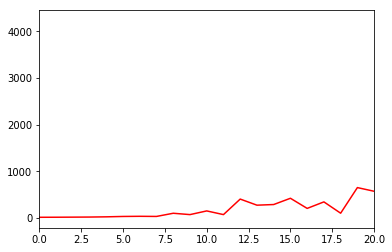

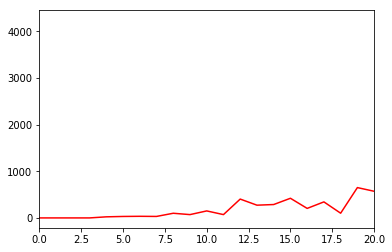

In [14]:
print(abs(freqGauche))
j = 0
k = 0
for i in freqGauche:
    if abs(i) < 20:
        j += 1
    else:
        k +=1
print("freqGauche")
print(j, k)
print(freqGauche)
print(type(freqGauche))
gaucheFreqTrait = intervalleSuppr(freqGauche)
droiteFreqTrait = intervalleSuppr3(freqDroite)
print(gaucheFreqTrait)
print("ABS")
print(abs(gaucheFreqTrait))
#c = asarray([1 + 1j * 3, 20+1j*4])
j = 0
k = 0
for i in gaucheFreqTrait:
    if abs(i) < 20:
        j += 1
    else:
        k += 1
print("gaucheFreqTrait")
print(j, k)
#gaucheFreqTrait = intervalleSuppr3(freqGauche)
print(gaucheFreqTrait)
j = 0
k = 0
for i in gaucheFreqTrait:
    if abs(i) != 0:
        j += 1
    else:
        k +=1
#print(j, k)
b = len(freqGauche) / 2 #pour la symétrie
plt.plot(abs(freqGauche[:(int(b)-1)]), 'r')
d = len(droiteFreqTrait) / 2
xlim(0, 20)
figure()
plt.plot(abs(gaucheFreqTrait[:(int(d)-1)]),'r')
xlim(0, 20)

In [15]:
def make_stereo(left, right):
    stereo = []
    for i in range(0, len(left)):
        stereo += [[left[i]] + [right[i]]]
    return asarray(stereo, dtype = np.int16)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


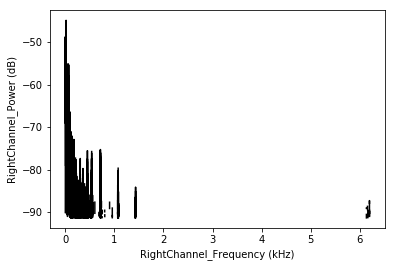

In [16]:
X = gaucheFreqTrait
m = len(X)
p2 = X / float(m) # scale by the number of points so that
                  # the magnitude does not depend on the length 
                  # of the signal or on its sampling frequency  
p2 = p2**2  # square it to get the power
mUniquePts = int(ceil((m+1)/2.0))# recupère la moitié du spectre
p2 = p2[0:mUniquePts]
p2 = abs(p2)
if m % 2 > 0: # we've got odd number of points fft
    p2[1:len(p2)] = p2[1:len(p2)] * 2
else:
    p2[1:len(p2) -1] = p2[1:len(p2) - 1] * 2 # we've got even number of points fft
freqArray2 = arange(0, mUniquePts, 1.0) * (freq / m);
plt.plot(freqArray2/1000, 10*log10(p2), color='k')
plt.xlabel('RightChannel_Frequency (kHz)')
plt.ylabel('RightChannel_Power (dB)')
plt.show()

#### I.2.Suppression des fréquences dîtes masquées:
Si dans un signal on a un niveau sonore plus élevé dans un groupe de fréquences, toutes les autres fréquences de ce groupe qui auront un niveau sonore plus faible ne seront pas audibles.
Toutes ces fréquences seront donc supprimées pour encore avoir un gain sur le poids final tout en dégradant légèrement le son.

#### I.3.Echelonnage des fréquences: =====================MODIFICATION !!
Pour un meilleur taux de compression, nous allons échelonner les fréquences de ce spectre.
Ainsi, toutes les valeurs dans un intervalle vont prendre la valeur moyenne de cet intervalle.
Le fait de ramener les valeurs proches à une seule valeur va permettre de gagner en place avec le codage de Huffman.
on fais très attention aux valeurs entre 20 et 5000Hz car ce sont les plus importantes (c'est là que se situe la parole par exemple), trop echantillonner reviendrait à perdre trop d'information.
pour la suite du spectre des fréquences (de 5 kHz à 16 kHz) on peut prendre des ecarts un peu plus important, mais pas trop quand même.
Et enfin, au delà de 16 kHz, on peut se permettre de perdre plus d'information, car la plupart des personnes n'entendent plus dans cette gamme de fréquences.

In [100]:
t = abs(gaucheFreqTrait)
listeFreq = []
for i in range (30,5000,20):
    listeFreq = listeFreq + [i]
listeFreq = asarray(listeFreq)

# trouver lindice la plus proche de la valeur dans un tableau numpy

c = t[5:20]
print(c)


[ 31.25873084  34.55090281  31.80913501  99.82450247  70.99957197
 149.93576896  71.05098358 403.72579452 273.00218689 286.86674347
 421.13417843 204.01520983 343.4628405  101.03435841 649.99607176]


In [109]:
t = abs(gaucheFreqTrait)

# creation de la liste des frequences
# on choisit de garder un intervalle de 20Hz pour les basses fréquences
listeFreq = []
for i in range (30,5000,20):
    listeFreq = listeFreq + [i]

# on garde un intervalle de 100Hz de 5 kHz a 16kHz
for i in range (5100, 16100, 100):
    listeFreq = listeFreq + [i]
    
# on garde un intervalle de 500 Hz de 16kHz a 20kHz
for i in range (16500, 20000, 500):
    listeFreq = listeFreq + [i]
print(listeFreq)

listeFreq = asarray(listeFreq)

# trouver lindice la plus proche de la valeur dans un tableau numpy
#print(abs(listeFreq - value).argmin())

c = t[5:20]

# attention a 5010, on fait quoi? mieux vaut 4990 ou 5100?
# c = [0, 200, 5010, 20000, 632]

for i in range(0,len(c)):
    if c[i] in listeFreq:
        c[i] = c[i] + 10
    else:
        indice = abs(listeFreq - c[i]).argmin()
        c[i] = listeFreq[indice]
print(c)

[30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990, 1010, 1030, 1050, 1070, 1090, 1110, 1130, 1150, 1170, 1190, 1210, 1230, 1250, 1270, 1290, 1310, 1330, 1350, 1370, 1390, 1410, 1430, 1450, 1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650, 1670, 1690, 1710, 1730, 1750, 1770, 1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1950, 1970, 1990, 2010, 2030, 2050, 2070, 2090, 2110, 2130, 2150, 2170, 2190, 2210, 2230, 2250, 2270, 2290, 2310, 2330, 2350, 2370, 2390, 2410, 2430, 2450, 2470, 2490, 2510, 2530, 2550, 2570, 2590, 2610, 2630, 2650, 2670, 2690, 2710, 2730, 2750, 2770, 2790, 2810, 2830, 2850, 2870, 2890, 2910, 2930, 2950, 2970, 2990, 3010, 3030, 3050, 3070, 3090, 3110, 3130, 3150, 3170, 3190, 3210, 3230, 3250, 3270, 3290, 3310, 3330, 3350, 3370, 3390, 3410, 3430, 3450, 3470, 3490, 3510, 35

#### I.4.Suppression des informations doubles:
Si dans le signal stéréo, on a les 2 parties (mono gauche et mono droite) qui contiennent une information très proche alors on n'en garde qu'une et les 2 monos auront ainsi la même valeurs.
Ici, le gain se fera aussi par le codage de Huffman.

### II.Les traitements sans perte d'informations:
#### II.1.Codage de l'information:
Si plusieurs fréquences identiques se succèdent dans une partie du signal, on va stocker la fréquence et le nombre de fois qu'elle apparait. Si par exemple, on a 10 échantillons qui se suivent, alors on ne codera que 2 valeurs au lieu de 10.
Là encore cela permet de gagner en place, cependant ici, on ne perds aucune information.

#### II.2.Codage de Huffman:
Son principe est de donner un code court pour l'information la plus fréquente à coder. Ce codage permet de réduire d'environ 20% en moyenne la taille d'un fichier. Ce type de compression est utilisé dans le codage MP3 mais pas seulement, les fichiers textes et images sont aussi concernés par exemple.
Ici plus une fréquence sera fréquente plus son code sera court.

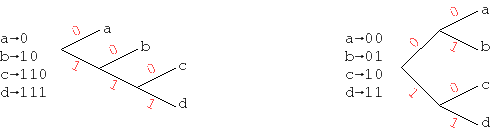

Dans cet exemple, le caractère __'a'__ est le plus fréquent, vient ensuite le __'b'__, etc... 
Nous avons implanté la méthode de gauche:

In [17]:
def huffmancode(dicofreq):
    listetriee = sorted(dicofreq.items(), key=lambda t : t[1], reverse=True)
    print(listetriee)
    dicoHuff = {}
    for i in range(len(listetriee)):
        if i == 0:
            codage = '0'
            dicoHuff[listetriee[i][0]] = codage
        if i == 1:
            codage = '1'
            dicoHuff[listetriee[i][0]] = codage
        if i == (len(listetriee) - 1):
            dicoHuff[listetriee[i][0]] = codage
        elif i > 0 and i < len(listetriee) - 1:
            dicoHuff[listetriee[i][0]] = codage + '0'
        codage += '1'
    return dicoHuff
        
    
dico = {'10':22, '12':3, '20':15, '5':4, '4':17}
dicoCode = huffmancode(dico)
print(dicoCode)

[('10', 22), ('4', 17), ('20', 15), ('5', 4), ('12', 3)]
{'10': '0', '4': '10', '20': '110', '5': '1110', '12': '1111'}


### III.L'en-tête MP3

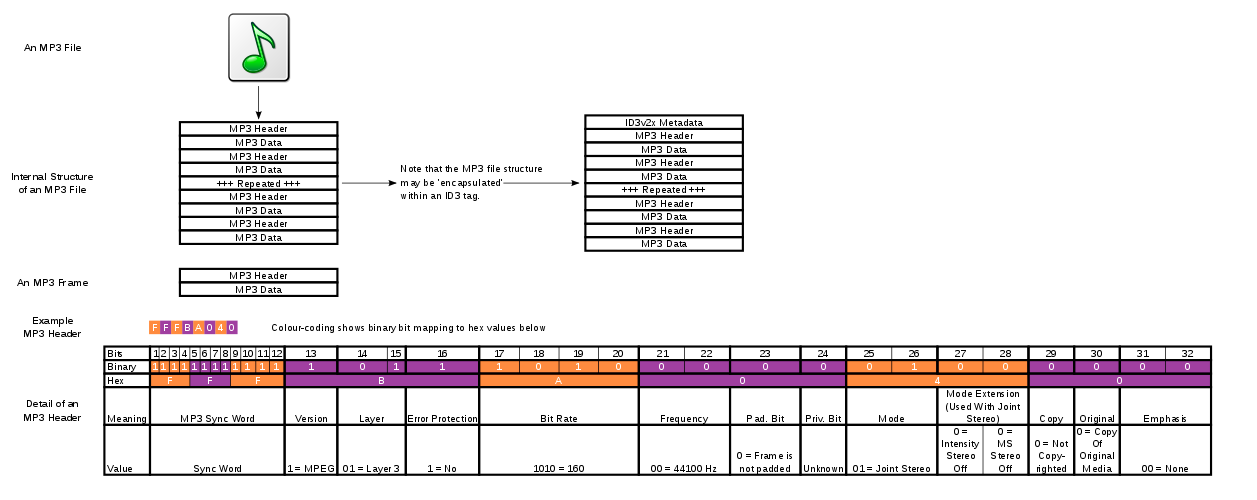